# Perform KMeans on 3 data sets: 

In [1]:
# Imports: 
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install torchvision
%pip install tqdm

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
import torchvision
from tqdm import tqdm
from scipy.special import softmax


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\koola\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\koola\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\koola\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\koola\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\koola\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Use Euclidean distance OR dot product to compute similarity. 
    # Can use library for distance/similarity, but have to implement own kmeans:
    # EM steps, termination criteria, etc.

# For all 3 data sets, evaluate:
    # KMeans objective for a higher K (for example double) or smaller K(for example half)
    # External clustering performance using data labels and performance metrics purity and gini index


In [3]:
# Euclidean Distance

def euclidean_distance(x, y):
    return np.linalg.norm(x - y)


In [4]:
# Dot product similarity

def dot_product(x, y):
    return np.dot(x, y)

In [ ]:
# KMeans: 
    # Initialize K cluster centers
    # Assign each data point to the nearest cluster center
    # Update cluster centers
    # Repeat until convergence (no change in cluster centers)
    # Termination criteria: max iterations, no change in cluster centers, etc.

def kmeans(data, k, similarity, text=False, max_iter=10):
    # Initialize cluster centers
    centers = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in tqdm(range(max_iter)):
        # Assign each data point to the nearest cluster center - E-step (best memberships closest to centers)
        clusters = [[] for _ in range(k)]
        for x in data: # lifestyle wise similar
            if(text == True):
                cluster = min(range(k), key=lambda c: similarity(x, centers[c]))
            elif(text == False):
                cluster = min(range(k), key=lambda c: similarity(x, centers[c]))
            clusters[cluster].append(x)

        # Update cluster centers - M-step (not changing memberships)
        new_centers = [np.mean(cluster, axis=0) for cluster in clusters]

        # Check for convergence
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers
        
    return centers, clusters



In [ ]:
# Fashion Dataset:

# From torchvision:
fashion_train = torchvision.datasets.FashionMNIST(root='./fashion', train=True, download=True, transform=None)
fashion_test = torchvision.datasets.FashionMNIST(root='./fashion', train=False, download=True, transform=None)
# print(len(fashion_train), len(fashion_test))

# print out number of labels:
# print(len(set(fashion_train.targets.numpy())))


10


In [7]:
kfashion = kmeans(fashion_train.data, 10, euclidean_distance)

 10%|█         | 1/10 [00:09<01:27,  9.70s/it]C:\Users\koola\AppData\Local\Temp\ipykernel_54820\1355589972.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return np.linalg.norm(x - y)
100%|██████████| 10/10 [04:54<00:00, 29.48s/it]


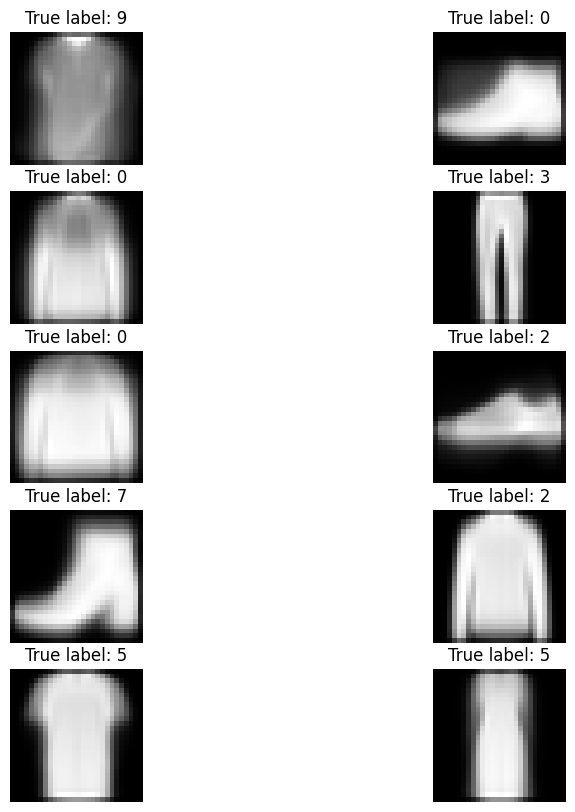

In [ ]:
# Visualize:
plt.figure(figsize=(10, 10))
for i, center in enumerate(kfashion[0]):
    plt.subplot(5, 2, i + 1)
    plt.imshow(center.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()



In [43]:
# Evaluate:
# 1. KMeans objective for a higher K (for example double) or smaller K(for example half)
# 2. External clustering performance using data labels and performance metrics purity and gini index

# 1. KMeans objective for a higher K (for example double) or smaller K(for example half)
# For higher K:
    # setting k 10 -> 20
# For smaller K:
    # setting k 10 -> 5
# kmeans(fashion_train.data, 5, euclidean_distance)

# Convert cluster assignments to predicted labels
def get_predicted_labels(clusters, data_length):
    labels = np.empty(data_length, dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_id
    return labels

# 2. Evaluate using data labels and performance metrics purity and gini index:
# compute confusion matrix:
from sklearn.metrics import confusion_matrix

kfastion_cm = confusion_matrix(fashion_train.targets.numpy(), get_predicted_labels(kfashion[1], len(fashion_train)))

def purity(cm):
    return np.sum(np.max(cm, axis=1)) / np.sum(cm)

def gini_index(cm):
    mad = np.abs(np.subtract.outer(cm, cm)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(cm)
    # Gini coefficient
    g = 0.5 * rmad
    return g





fashion_purity = purity(kfastion_cm)
fashion_gini = gini_index(kfastion_cm)
print(f'Purity: {fashion_purity}, Gini Index: {fashion_gini}')



Purity: 0.9957333333333334, Gini Index: 0.899198


In [116]:
def kmeans(data, k, similarity, text=False, max_iter=2):
    # Initialize cluster centers
    centers = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in tqdm(range(max_iter)):
        # Assign each data point to the nearest cluster center - E-step (best memberships closest to centers)
        clusters = [[] for _ in range(k)]
        for x in data: # lifestyle wise similar
            if(text == True):
                cluster = min(range(k), key=lambda c: similarity(x, centers[c]))
            elif(text == False):
                cluster = min(range(k), key=lambda c: similarity(x, centers[c]))
            clusters[cluster].append(x)

        # Update cluster centers - M-step (not changing memberships)
        new_centers = [np.mean(cluster, axis=0) for cluster in clusters]

        # Check for convergence
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers
        
    return centers, clusters


# 20 Newsgroups Dataset:

# From torch vision:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

print(len(newsgroups_train.data), len(newsgroups_test.data))

from sklearn.feature_extraction.text import TfidfVectorizer
# Convert the text data to TF-IDF features
vectorizer = TfidfVectorizer(max_df = 0.5, min_df=5, stop_words='english')
newsgroups_train_tfidf = vectorizer.fit_transform(newsgroups_train.data).toarray()

# implement kmeans for text using cosine similarity:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

knewsgroups = kmeans(newsgroups_train_tfidf, 20, cosine_similarity, text=True)

11314 7532


100%|██████████| 2/2 [00:59<00:00, 29.52s/it]


In [ ]:
def get_predicted_labels_text(clusters, data_length):
    labels = np.empty(data_length, dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[int(index)] = cluster_id  # Ensure index is an integer
    return labels


# calculate purity and gini index:
newsgroups_cm = confusion_matrix(newsgroups_train.target, get_predicted_labels_text(knewsgroups[1], len(newsgroups_train.target)))
newsgroups_purity = purity(newsgroups_cm)
newsgroups_gini = gini_index(newsgroups_cm)
print(f'Purity: {newsgroups_purity}, Gini Index: {newsgroups_gini}')


TypeError: only length-1 arrays can be converted to Python scalars

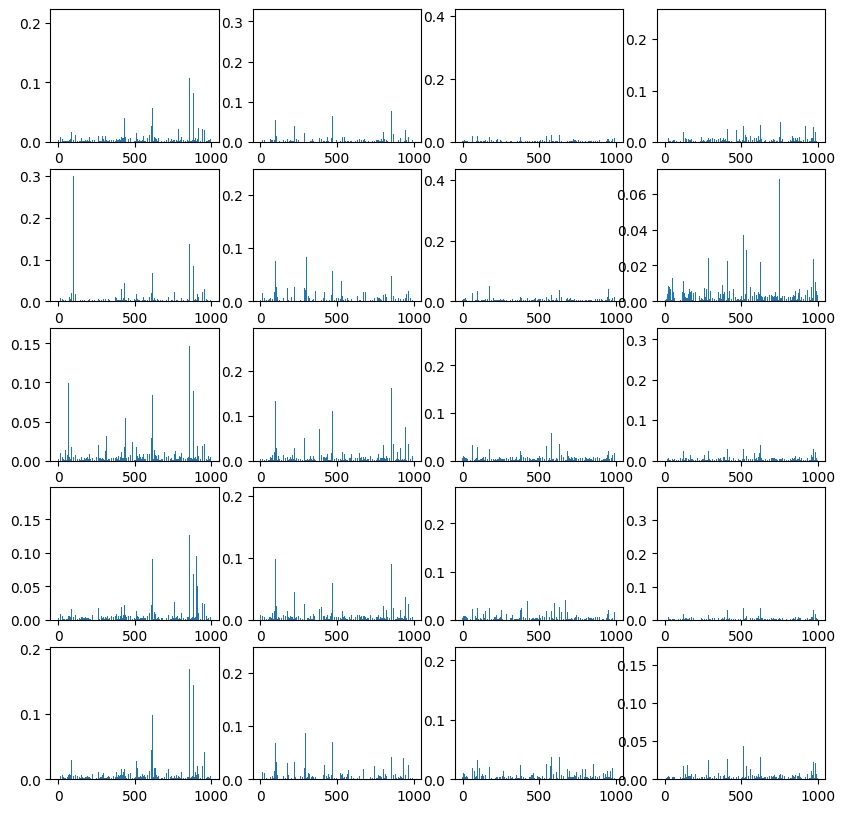

In [ ]:
# Visualize:
plt.figure(figsize=(10, 10))
for i, center in enumerate(Knewsgroups[0]):
    plt.subplot(5, 4, i + 1)
    plt.bar(range(1000), center)
plt.show()


In [61]:
# MNIST Dataset: 

# From torch vision
digits_train = torchvision.datasets.MNIST(root='./digits', train=True, download=True)
digits_test = torchvision.datasets.MNIST(root='./digits', train=False, download=True)
print(len(digits_train), len(digits_test))


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:03<00:00, 3.19MB/s]


Extracting ./digits\MNIST\raw\train-images-idx3-ubyte.gz to ./digits\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.80MB/s]

Extracting ./digits\MNIST\raw\train-labels-idx1-ubyte.gz to ./digits\MNIST\raw



Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.17MB/s]


Extracting ./digits\MNIST\raw\t10k-images-idx3-ubyte.gz to ./digits\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]

Extracting ./digits\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./digits\MNIST\raw

60000 10000


In [62]:
kdigits = kmeans(digits_train.data, 10, euclidean_distance)

 10%|█         | 1/10 [00:10<01:36, 10.67s/it]C:\Users\koola\AppData\Local\Temp\ipykernel_54820\1355589972.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return np.linalg.norm(x - y)
100%|██████████| 10/10 [05:08<00:00, 30.88s/it]


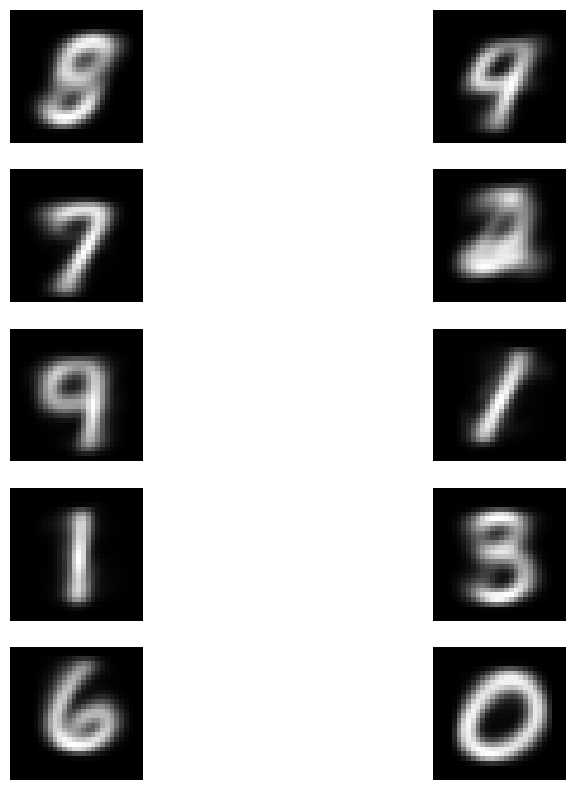

In [64]:
# visualize:
plt.figure(figsize=(10, 10))
for i, center in enumerate(kdigits[0]):
    plt.subplot(5, 2, i + 1)
    plt.imshow(center.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


In [65]:
# Purity and Gini Index:
kdigits_cm = confusion_matrix(digits_train.targets.numpy(), get_predicted_labels(kdigits[1], len(digits_train)))
digits_purity = purity(kdigits_cm)
digits_gini = gini_index(kdigits_cm)
print(f'Purity: {digits_purity}, Gini Index: {digits_gini}')


Purity: 0.9957333333333334, Gini Index: 0.9018873333333333


In [138]:
%pip install scipy
import scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\koola\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [139]:
# D) Run soft kmeans. Use K = 10. Try beta = 0.1, 1, 10. Evaluate performance. 

def soft_kmeans(data, k, beta, similarity, max_iter=10):
    # Initialize cluster centers
    centers = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in tqdm(range(max_iter)):
        # Assign each data point to the nearest cluster center - E-step (softmax probability to map likelihood of data point to cluster using actual value (as opposed to argmax)
        memberships = np.zeros((data.shape[0], k))
        for j, x in enumerate(data):
            for c in range(k):
                # soft max:
                memberships[j, c] = np.exp(-beta * similarity(x, centers[c]))
            memberships[j] /= np.sum(memberships[j])

        # Update cluster centers - M-step
        new_centers = np.zeros_like(centers)
        for c in range(k):
            new_centers[c] = np.average(data, axis=0, weights=memberships[:, c])

        # Check for convergence
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers

    return centers, memberships
    

In [140]:
# Visualize:
soft_k_digits = soft_kmeans(digits_train.data, 10, 0.1, euclidean_distance)
soft_k_digits_1 = soft_kmeans(digits_train.data, 10, 1, euclidean_distance)
soft_k_digits_10 = soft_kmeans(digits_train.data, 10, 10, euclidean_distance)

 10%|█         | 1/10 [00:13<02:00, 13.35s/it]C:\Users\koola\AppData\Local\Temp\ipykernel_54820\1355589972.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return np.linalg.norm(x - y)
  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\koola\AppData\Local\Temp\ipykernel_54820\859778458.py:14: RuntimeWarning: invalid value encountered in divide
  memberships[j] /= np.sum(memberships[j])
C:\Users\koola\AppData\Local\Temp\ipykernel_54820\859778458.py:19: RuntimeWarning: invalid value encountered in cast
  new_centers[c] = np.average(data, axis=0, weights=memberships[:, c])
 10%|█         | 1/10 [00:48<07:13, 48.19s/it]


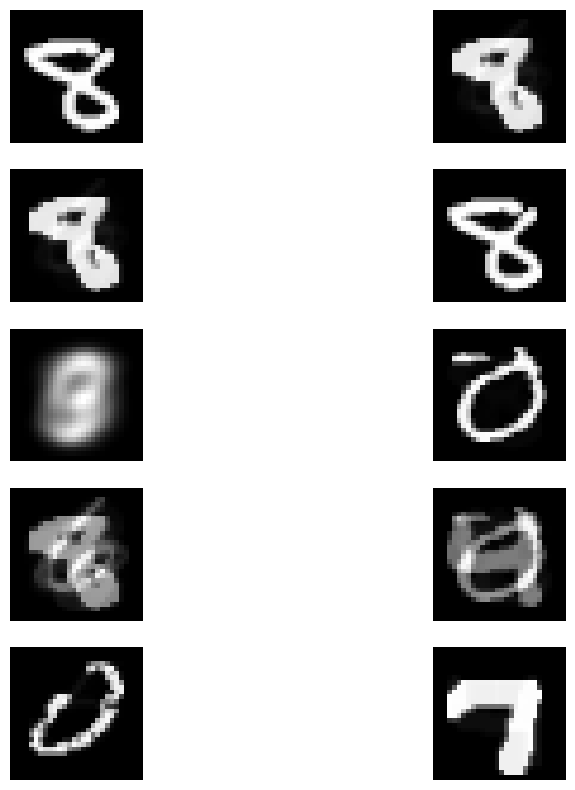

In [ ]:
plt.figure(figsize=(10, 10))
for i, center in enumerate(soft_k_digits[0]):
    plt.subplot(5, 2, i + 1)
    plt.imshow(center.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


In [143]:
# evaluate performance of soft kmeans:
ksoft_digits_cm = confusion_matrix(digits_train.targets.numpy(), get_predicted_labels(soft_k_digits[1].argmax(axis=1), len(digits_train)))
digits_soft_purity = purity(ksoft_digits_cm)
digits_soft_gini = gini_index(ksoft_digits_cm)
print(f'Purity: {digits_soft_purity}, Gini Index: {digits_soft_gini}')



TypeError: 'numpy.int64' object is not iterable